<a href="https://www.kaggle.com/code/mh0386/logistic-regression?scriptVersionId=125733505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib.pyplot import plot as plt
import sys

In [2]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(X, W, b):
    return sigmoid(np.dot(X, W) + b)

In [5]:
def cost(y, y_hat):
    return np.mean(-y * np.log(y_hat + sys.float_info.min) - (1 - y) * np.log(1 - y_hat + sys.float_info.min))

In [6]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    b = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, b)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        b -= learning_rate * db
        if i % 100 == 0:
            c: float = cost(y, y_hat)
            costs = np.append(costs, c)
            print(f"Cost at epoch {i}: {c}")
    return W, b, costs

In [7]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    y_hat = np.round(y_hat)
    return accuracy(y, y_hat)

In [8]:
def k_fold_cross_validation(X, y, k, lr, epochs):
    fold_size = len(X) // k
    accuracies = []
    for i in range(k):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        X_test = X[i * fold_size:(i + 1) * fold_size]
        Y_test = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"----------Training at Fold {i + 1} of {k}----------")
        w, b, c = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"----------Testing at Fold {i + 1} of {k}----------")
        acc = test(X_test, Y_test, w, b)
        print(f"Accuracy at Fold {i + 1} of {k}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), c

In [9]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [10]:
trainSet, testSet = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
xTrain = trainSet[0].astype('float32')
yTrain = trainSet[1].astype('int32')
xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTrain = np.concatenate([xTrain[yTrain == 0], xTrain[yTrain == 1]])
yTrain = np.concatenate([yTrain[yTrain == 0], yTrain[yTrain == 1]])
xTrain = standardize(xTrain)

In [12]:
k = 10
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c = k_fold_cross_validation(xTrain, yTrain, k, 0.01, 1000)
print(average_accuracy)
print(c)

----------K-Fold Cross Validation with 10 Folds and eta 0.01----------
----------Training at Fold 1 of 10----------
Cost at epoch 0: 224.50216289589963
Cost at epoch 100: 12.752880247781421
Cost at epoch 200: 5.405339241644282
Cost at epoch 300: 3.250512887604205
Cost at epoch 400: 2.291495781107848
Cost at epoch 500: 1.9211861353773079
Cost at epoch 600: 1.478787772551281
Cost at epoch 700: 1.2383225045559005
Cost at epoch 800: 1.1915291855482393
Cost at epoch 900: 1.1558022109042323
----------Testing at Fold 1 of 10----------
Accuracy at Fold 1 of 10: 0.9826224328593997
----------Training at Fold 2 of 10----------
Cost at epoch 0: 236.45197351975608
Cost at epoch 100: 13.11618810651127
Cost at epoch 200: 5.123143673064668
Cost at epoch 300: 3.2116053601369003
Cost at epoch 400: 2.27187120668164
Cost at epoch 500: 1.6650292654893022
Cost at epoch 600: 1.3980223608491236
Cost at epoch 700: 1.2181145627309038
Cost at epoch 800: 1.0554574487788877
Cost at epoch 900: 0.9628347314044547
--

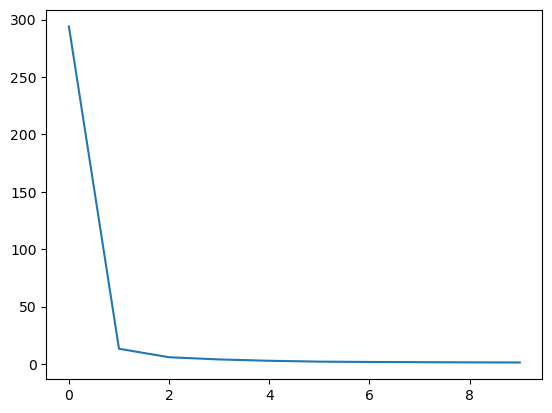

In [13]:
#graph the cost
plt(c)

In [14]:
k = 10
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c = k_fold_cross_validation(xTrain, yTrain, k, 0.001, 1000)
print(average_accuracy)
print(c)

----------K-Fold Cross Validation with 10 Folds and eta 0.001----------
----------Training at Fold 1 of 10----------
Cost at epoch 0: 244.8547224698109
Cost at epoch 100: 210.49741350868555
Cost at epoch 200: 170.61479130110112
Cost at epoch 300: 129.69606700956916
Cost at epoch 400: 92.04401691921318
Cost at epoch 500: 63.920773372191064
Cost at epoch 600: 45.68589069053398
Cost at epoch 700: 31.96952728538807
Cost at epoch 800: 24.79604047625272
Cost at epoch 900: 19.693231792938658
----------Testing at Fold 1 of 10----------
Accuracy at Fold 1 of 10: 0.7756714060031595
----------Training at Fold 2 of 10----------
Cost at epoch 0: 236.50025282308363
Cost at epoch 100: 203.78297843618884
Cost at epoch 200: 164.11779543206194
Cost at epoch 300: 122.21156825404624
Cost at epoch 400: 83.2694117365357
Cost at epoch 500: 55.73845716562559
Cost at epoch 600: 38.96342865048965
Cost at epoch 700: 28.18145957643005
Cost at epoch 800: 22.203407397792077
Cost at epoch 900: 17.454670741283376
---

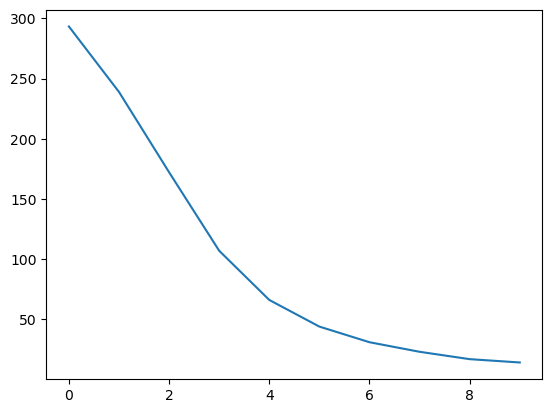

In [15]:
#graph the cost
plt(c)